In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functools
import pvtrace
import scintillator_tracer as st

# Verification

In [4]:
world_func = functools.partial(st.worlds.build_plate_world)
nodes = world_func()
world = nodes['world']
crystal = nodes['crystal']

height = st.geometry_helpers.get_node_height(nodes['crystal'])
light = st.definitions.generate_scintillated_light_node(world, 'light')
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, num_photons=100, seed=10, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7003/static/


# Grid trials

In [9]:
nodes = world_func()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.5,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.2,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.2,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7005/static/


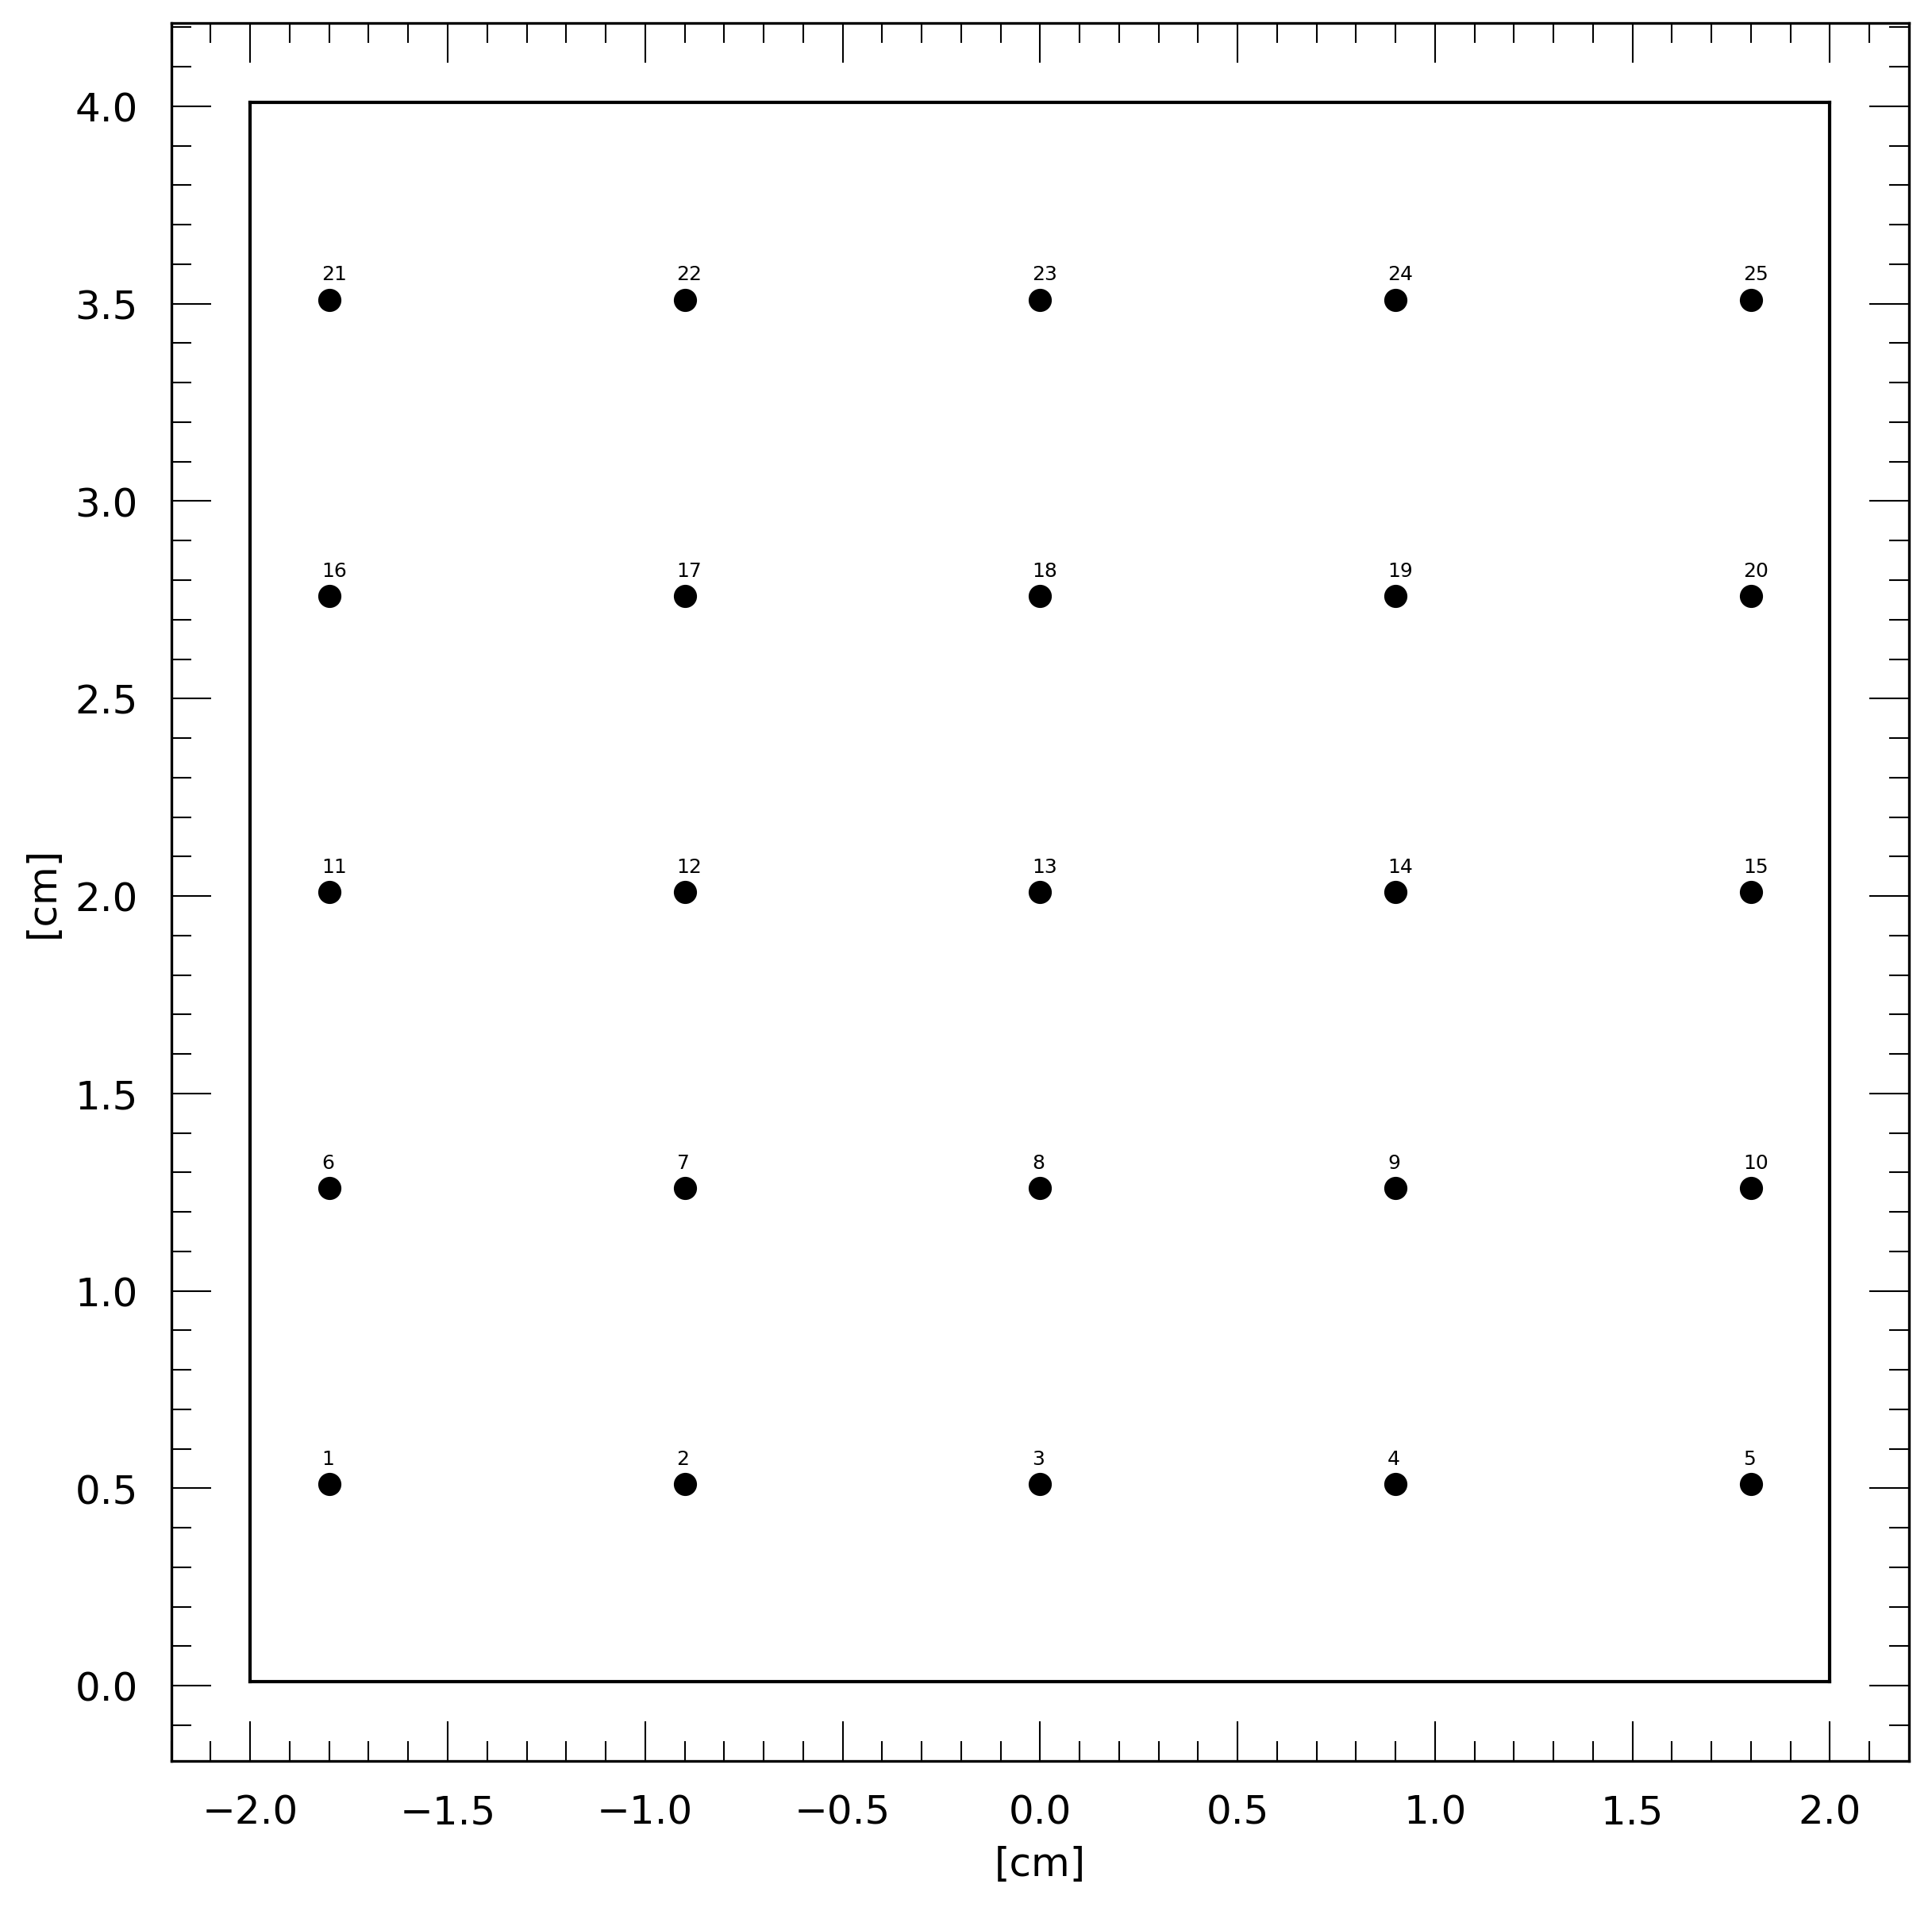

In [10]:
steps = 5
man = st.processing.Manager(world_func, f'plate')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: yrange,
    steps=steps,
    visualize=True
)

In [11]:
runs = man.run(200, seed=10, visualize=False)

plate/runs_20241025T161340/figures/crystal_absorbed.png
plate/runs_20241025T161340/figures/optical pad_absorbed.png
plate/runs_20241025T161340/figures/sipm_absorbed.png


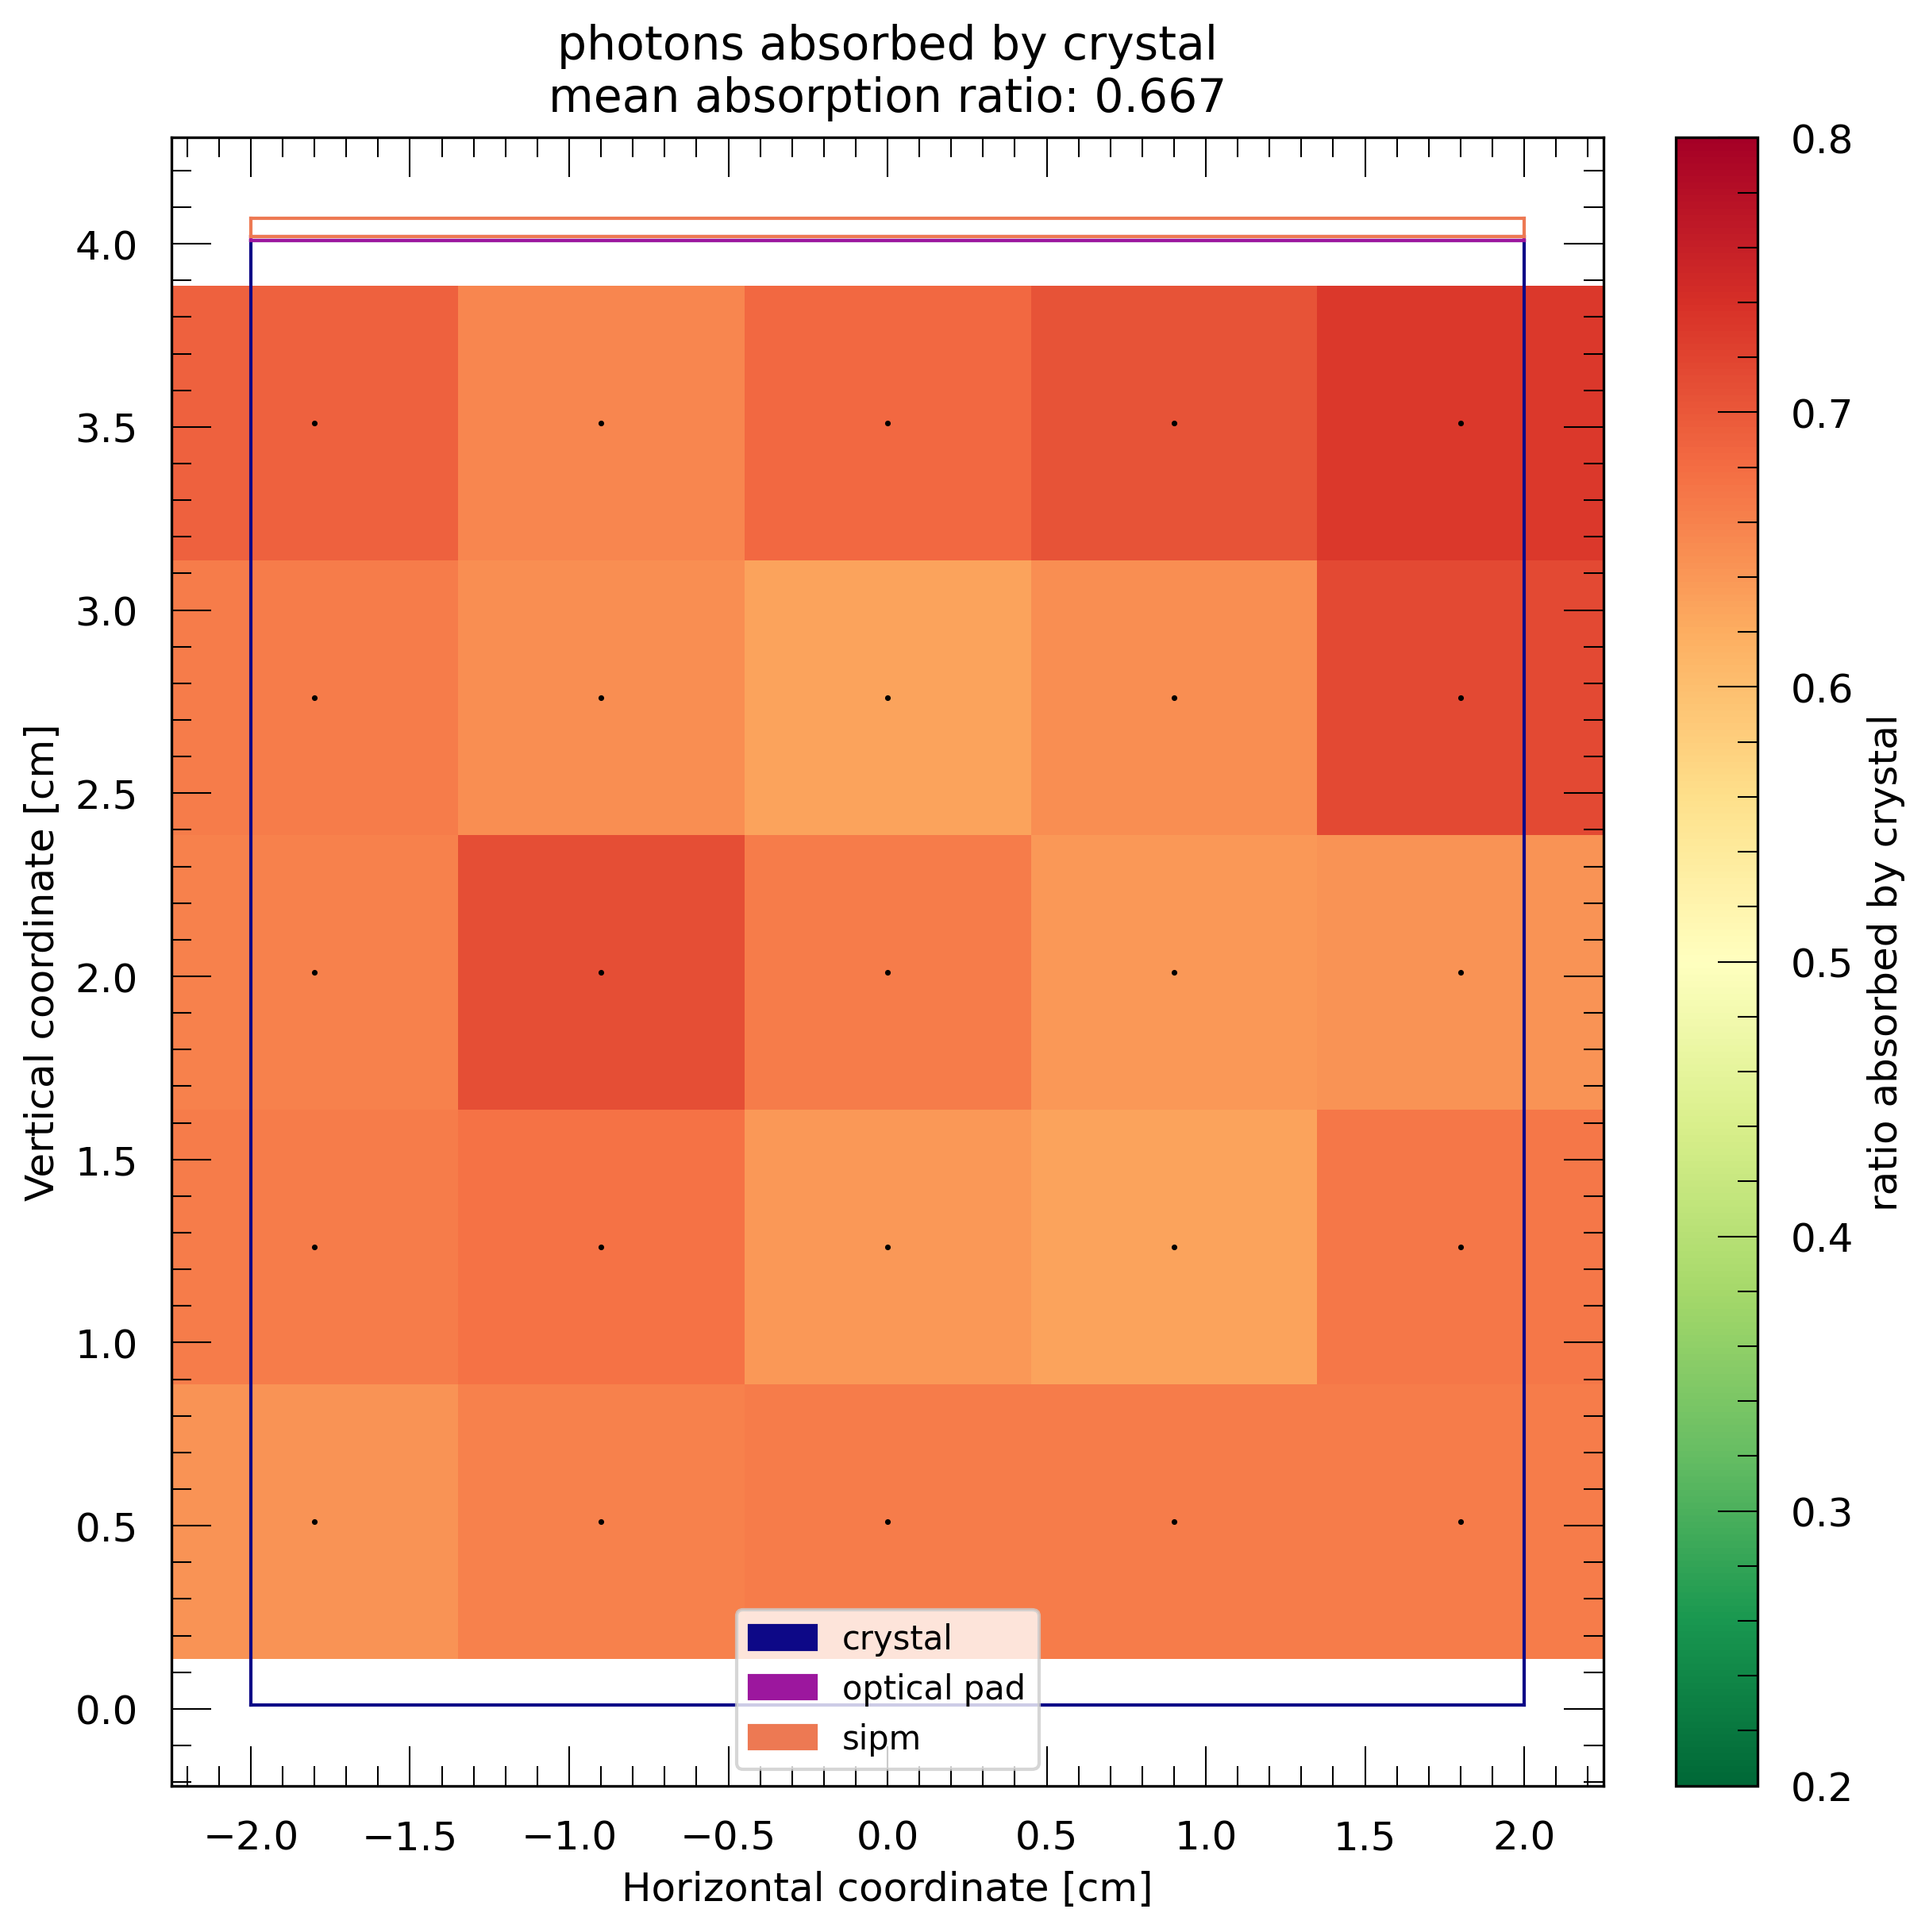

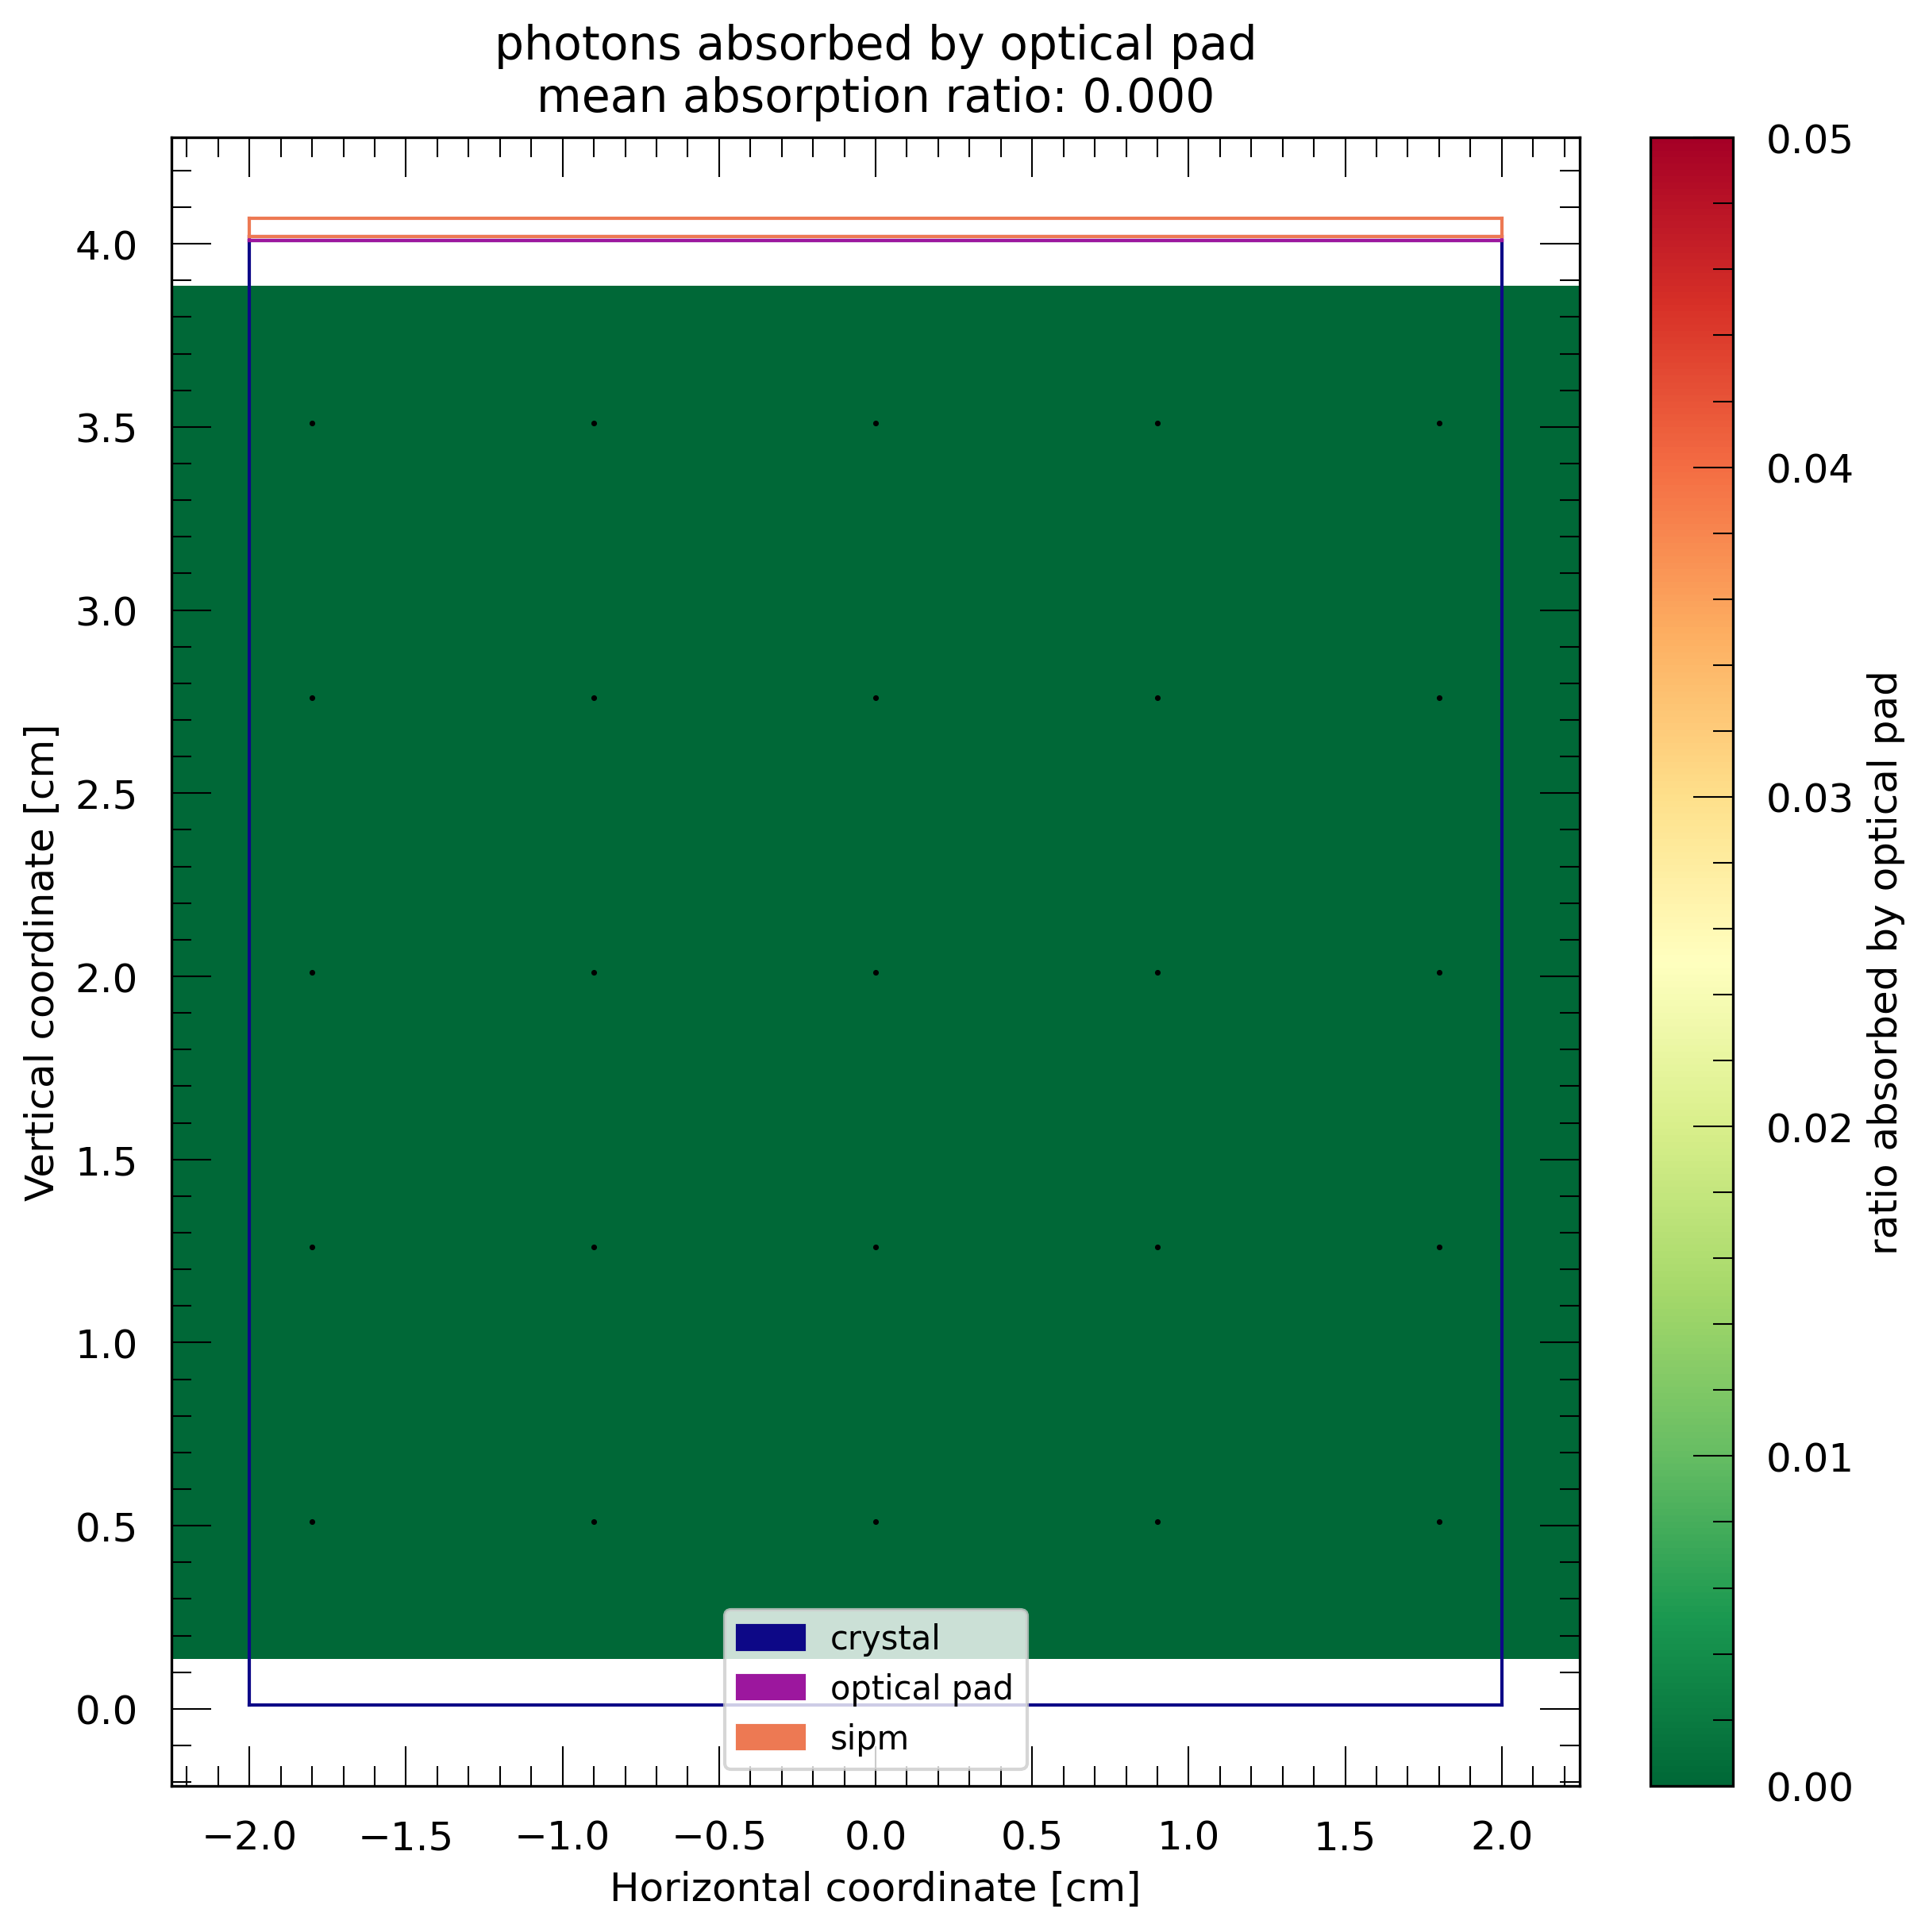

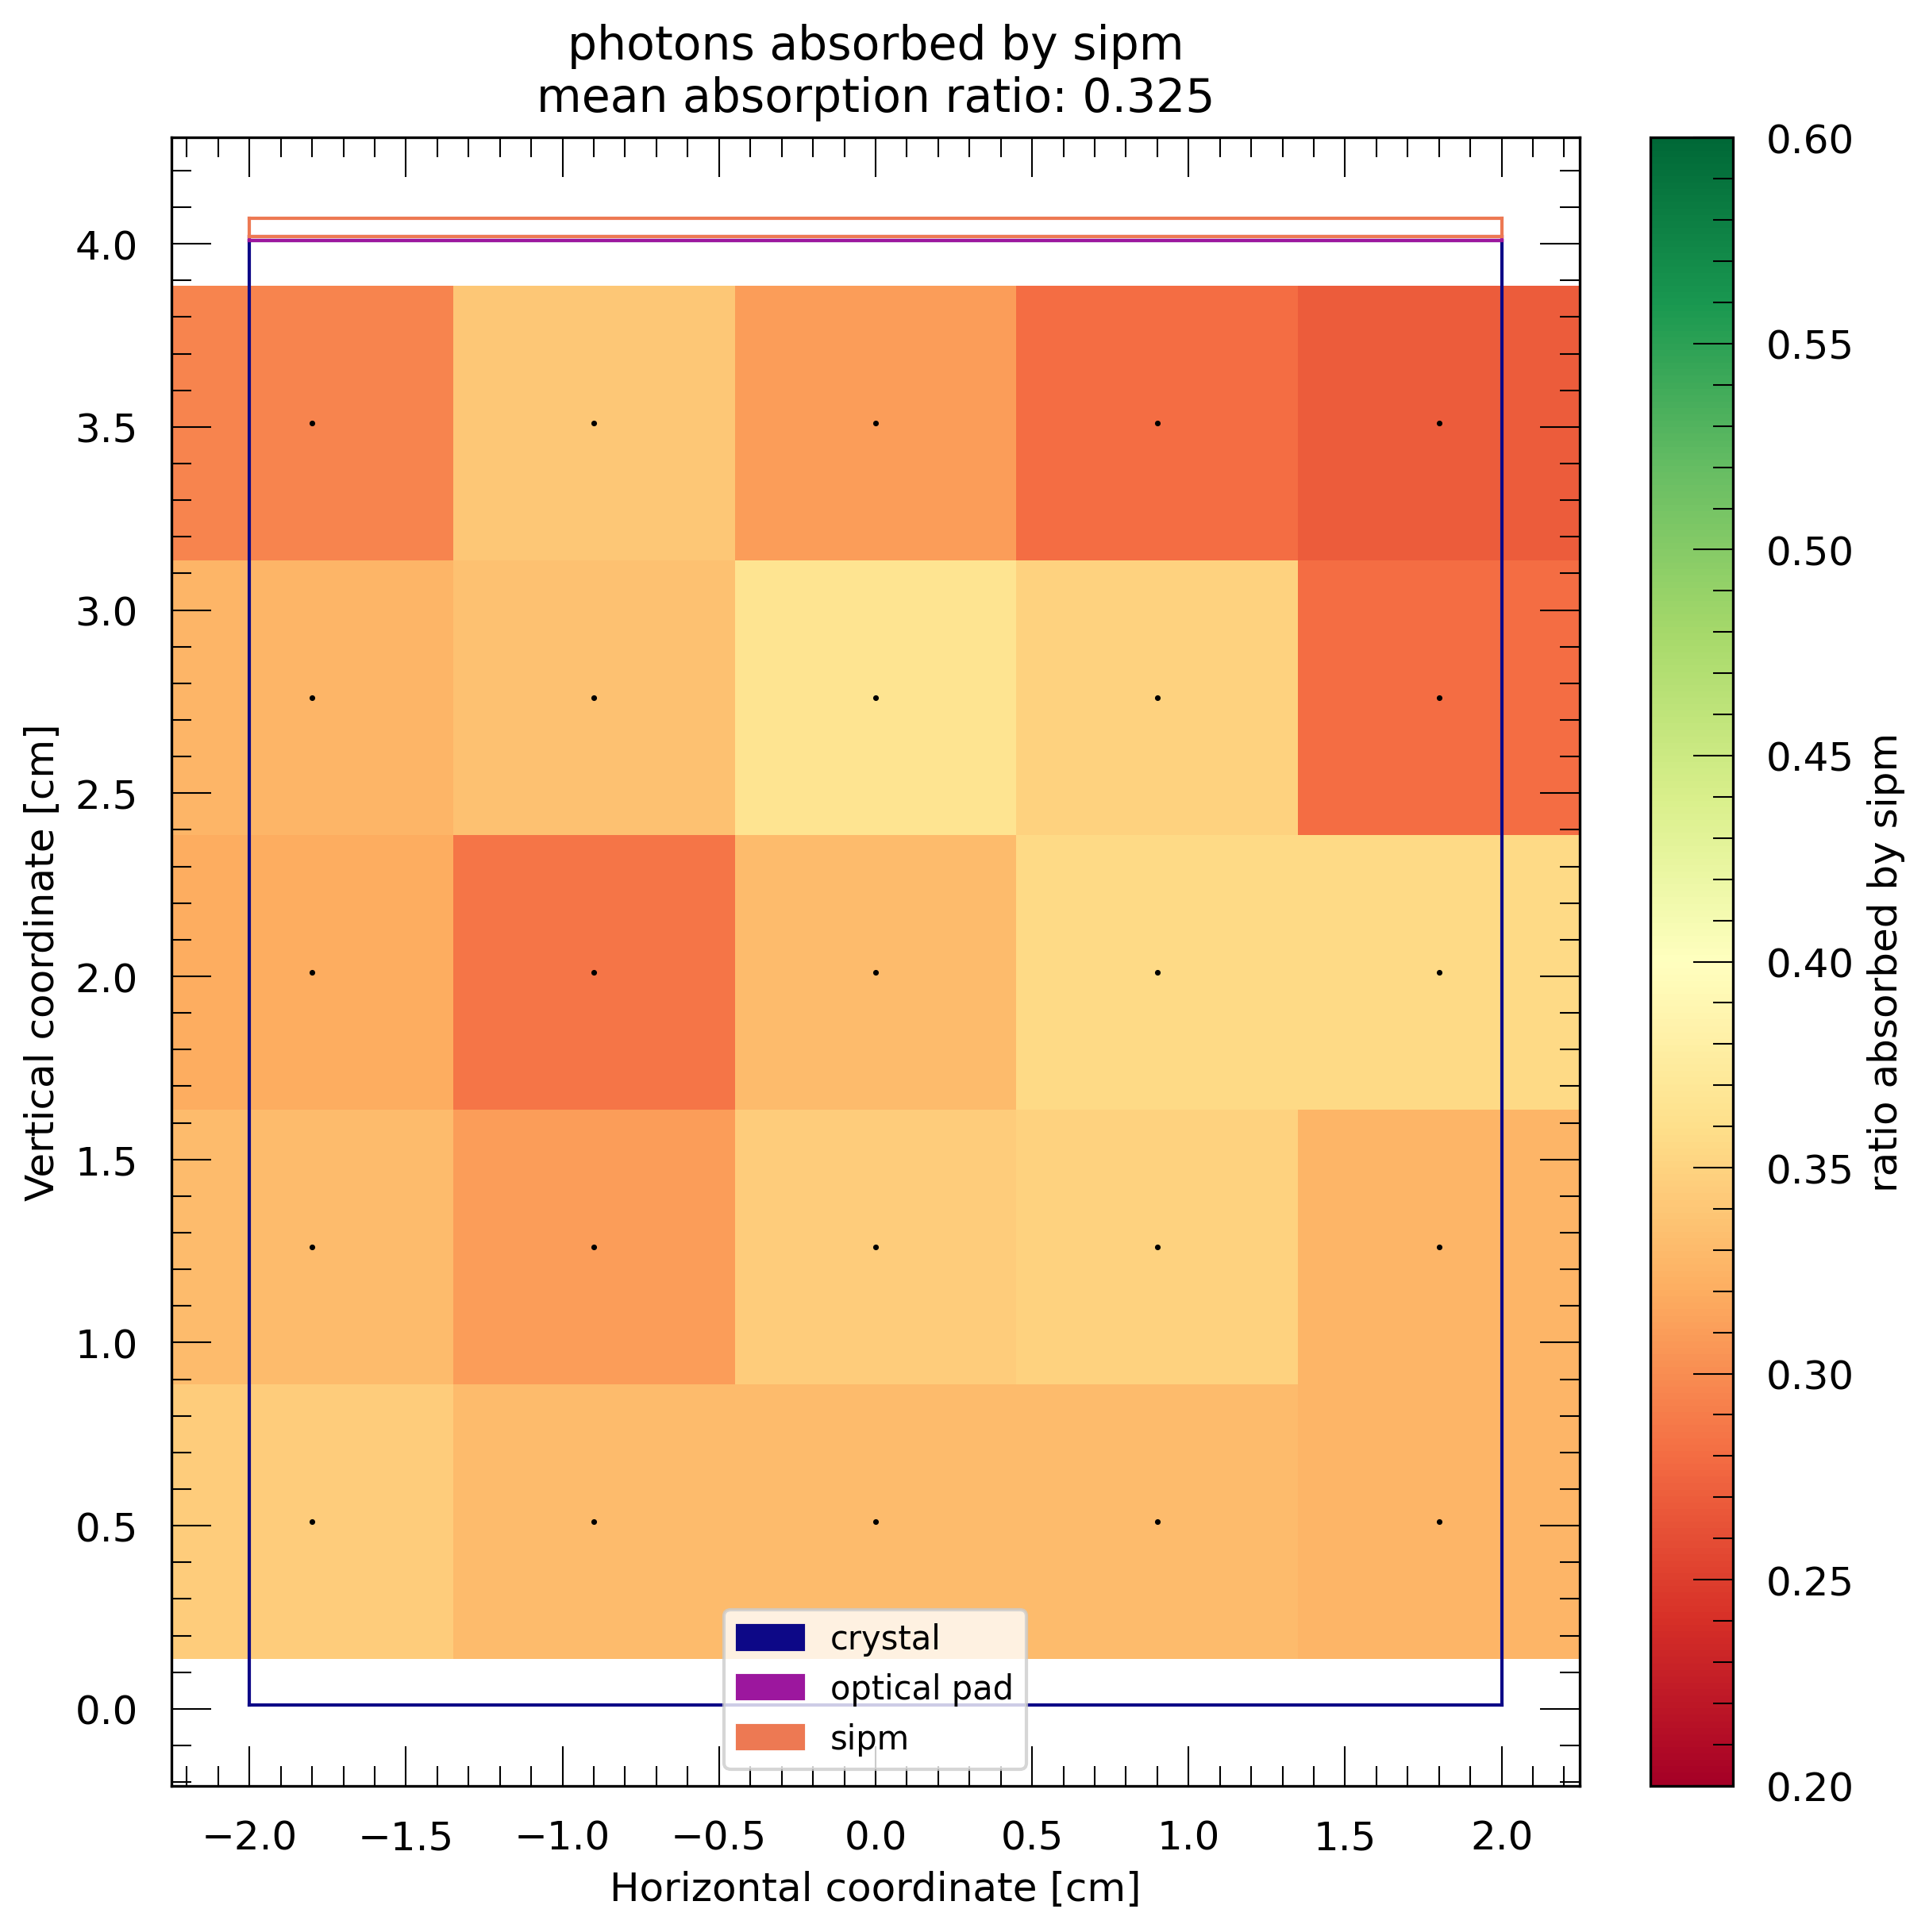

In [12]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=0.6))